<a href="https://colab.research.google.com/github/Rishzbh/EDA/blob/main/21BDS0093.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy.stats import skew, kurtosis
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN


# Ensure plots are displayed inline
%matplotlib inline


In [35]:
# ================== UPLOAD FILE (FOR GOOGLE COLAB USERS) ==================
from google.colab import files

# Upload the CSV file manually
uploaded = files.upload()

# Read the dataset
file_path = list(uploaded.keys())[0]  # Get uploaded filename
data = pd.read_csv(file_path)


Saving Medicaid1986.csv to Medicaid1986 (1).csv


In [3]:

# ================== DATA PREPROCESSING ==================

# Identify numerical and categorical columns
num_cols = data.select_dtypes(include=['number']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()


In [4]:

# Drop unnecessary columns (if applicable)
cols_to_drop = ['fuel-system', 'bore']
data.drop(columns=[col for col in cols_to_drop if col in data.columns], axis=1, inplace=True)


In [5]:

# Encode categorical variables
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Fill missing values
data.fillna(data.mean(), inplace=True)

# Scale income
scaler = MinMaxScaler()
data['Income_Scaled'] = scaler.fit_transform(data[['income']])

# Create a new feature
data['Income_per_Child'] = data['income'] / (data['children'] + 1)


In [6]:

# ================== EXPLORATORY DATA ANALYSIS ==================

# Display dataset shape and column info
print("Dataset Shape:", data.shape)


Dataset Shape: (996, 17)


In [7]:
print("Columns:", data.columns.tolist())


Columns: ['rownames', 'visits', 'exposure', 'children', 'age', 'income', 'health1', 'health2', 'access', 'married', 'gender', 'ethnicity', 'school', 'enroll', 'program', 'Income_Scaled', 'Income_per_Child']


In [8]:
print("Data Types:\n", data.dtypes)


Data Types:
 rownames              int64
visits                int64
exposure              int64
children              int64
age                   int64
income              float64
health1             float64
health2             float64
access              float64
married               int64
gender                int64
ethnicity             int64
school                int64
enroll                int64
program               int64
Income_Scaled       float64
Income_per_Child    float64
dtype: object


In [9]:
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 rownames            0
visits              0
exposure            0
children            0
age                 0
income              0
health1             0
health2             0
access              0
married             0
gender              0
ethnicity           0
school              0
enroll              0
program             0
Income_Scaled       0
Income_per_Child    0
dtype: int64


In [10]:
# Summary statistics
print("Summary Statistics:\n", data.describe())


Summary Statistics:
          rownames      visits    exposure    children         age      income  \
count  996.000000  996.000000  996.000000  996.000000  996.000000  996.000000   
mean   498.500000    1.930723  104.060241    1.314257   55.205823    8.191302   
std    287.664735    3.354472    9.144973    1.509314   24.961373    3.630549   
min      1.000000    0.000000   32.000000    0.000000   16.000000    0.500000   
25%    249.750000    0.000000   98.000000    0.000000   29.000000    6.000000   
50%    498.500000    1.000000  104.000000    1.000000   66.000000    7.990000   
75%    747.250000    3.000000  111.000000    2.000000   78.000000    8.500000   
max    996.000000   50.000000  120.000000    9.000000  105.000000   17.500000   

          health1     health2      access     married      gender   ethnicity  \
count  996.000000  996.000000  996.000000  996.000000  996.000000  996.000000   
mean    -0.000013    0.000020    0.398102    0.216867    0.153614    0.306225   
std   

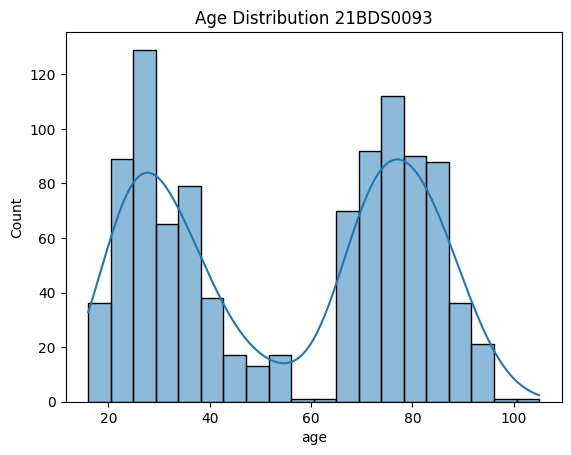

In [11]:
# ================== UNIVARIATE ANALYSIS ==================
sns.histplot(data['age'], bins=20, kde=True)
plt.title("Age Distribution 21BDS0093")
plt.show()


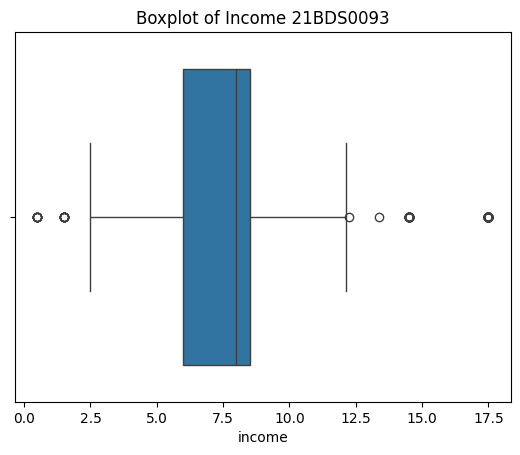

In [12]:
sns.boxplot(x=data['income'])
plt.title("Boxplot of Income 21BDS0093")
plt.show()


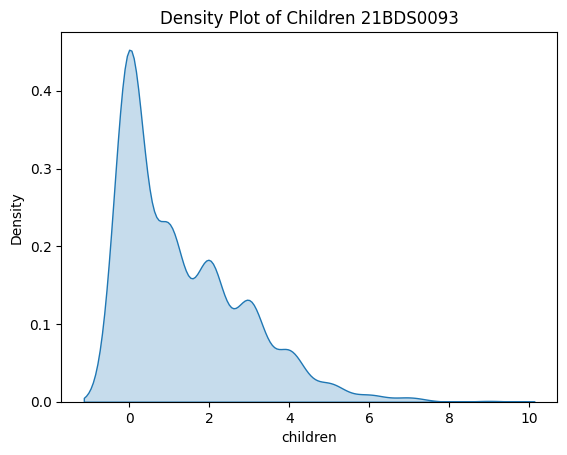

In [13]:
sns.kdeplot(data['children'], fill=True)
plt.title("Density Plot of Children 21BDS0093")
plt.show()

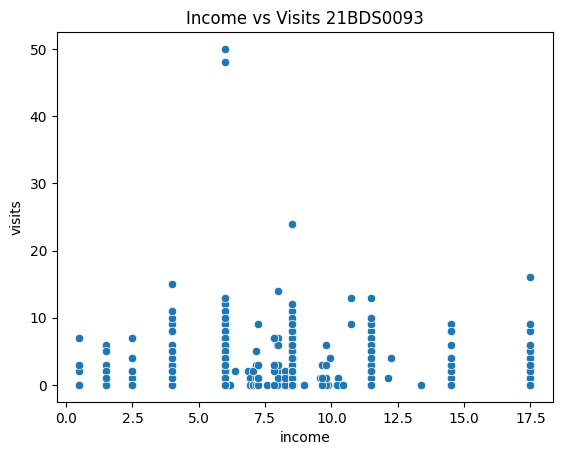

In [14]:
# ================== BIVARIATE ANALYSIS ==================
sns.scatterplot(x=data['income'], y=data['visits'])
plt.title("Income vs Visits 21BDS0093")
plt.show()

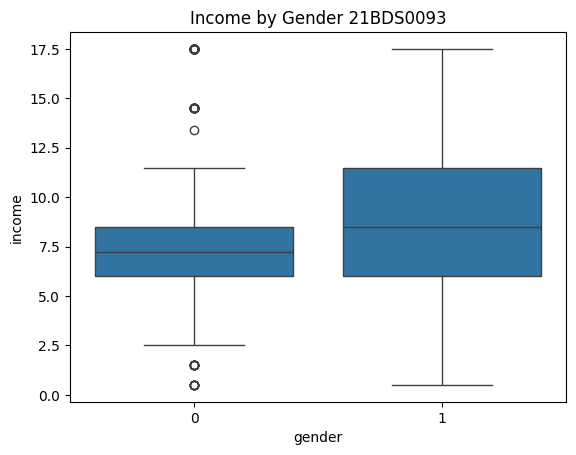

In [15]:
sns.boxplot(x=data['gender'], y=data['income'])
plt.title("Income by Gender 21BDS0093")
plt.show()


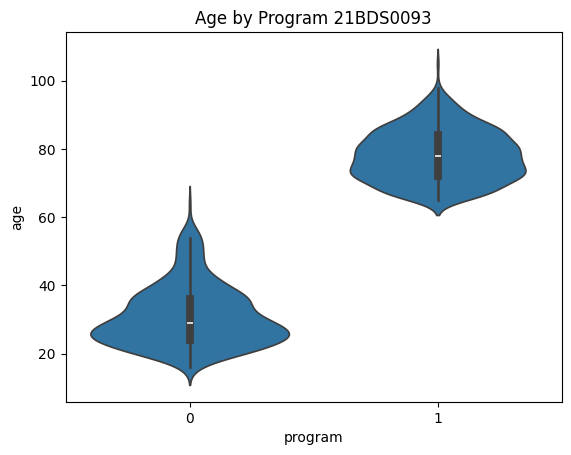

In [16]:

sns.violinplot(x=data['program'], y=data['age'])
plt.title("Age by Program 21BDS0093")
plt.show()


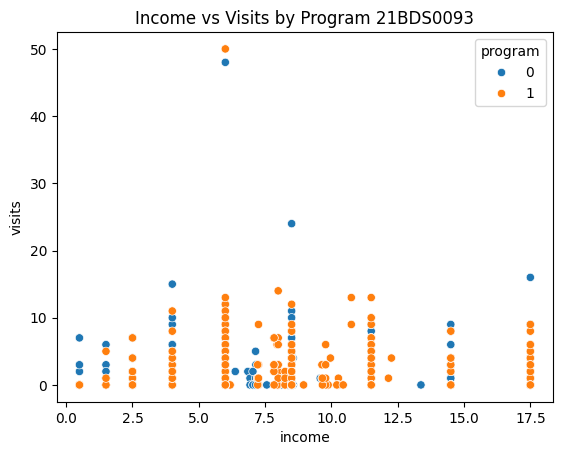

In [17]:

# ================== MULTIVARIATE ANALYSIS ==================
sns.scatterplot(x=data['income'], y=data['visits'], hue=data['program'])
plt.title("Income vs Visits by Program 21BDS0093")
plt.show()


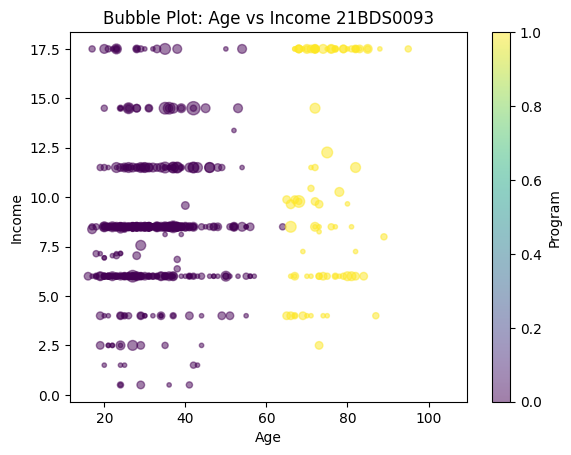

In [18]:

plt.scatter(data['age'], data['income'], s=data['children']*10, alpha=0.5, c=data['program'])
plt.title("Bubble Plot: Age vs Income 21BDS0093")
plt.xlabel("Age")
plt.ylabel("Income")
plt.colorbar(label="Program")
plt.show()


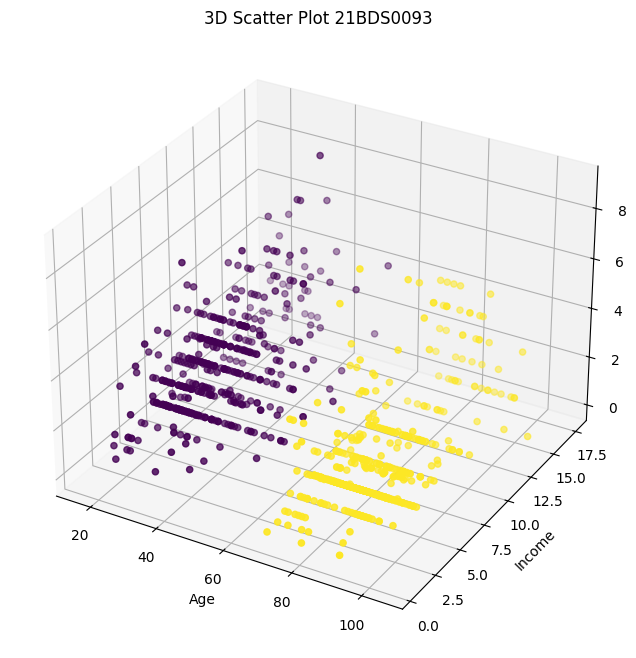

In [20]:

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['age'], data['income'], data['children'], c=data['program'])
ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Children")
plt.title("3D Scatter Plot 21BDS0093")
plt.show()


PHASE 2

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Scale numeric columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


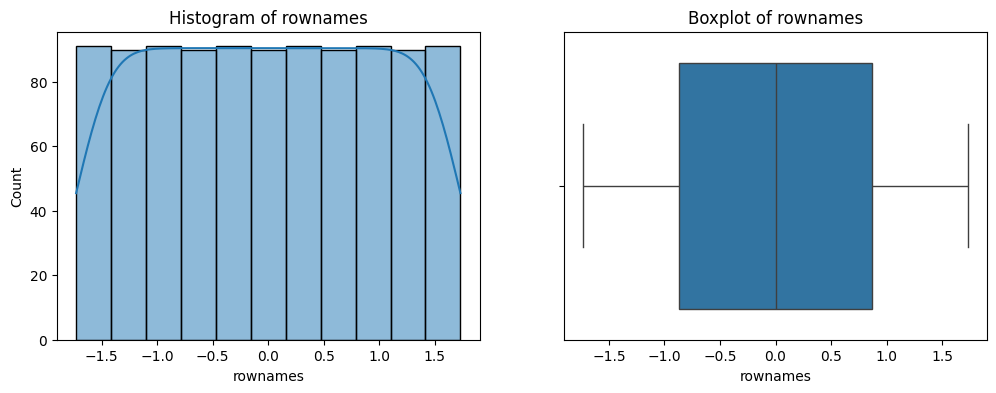

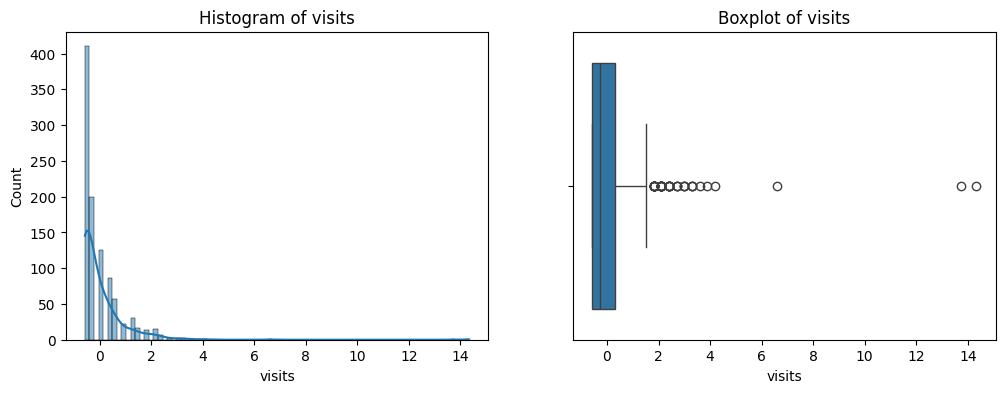

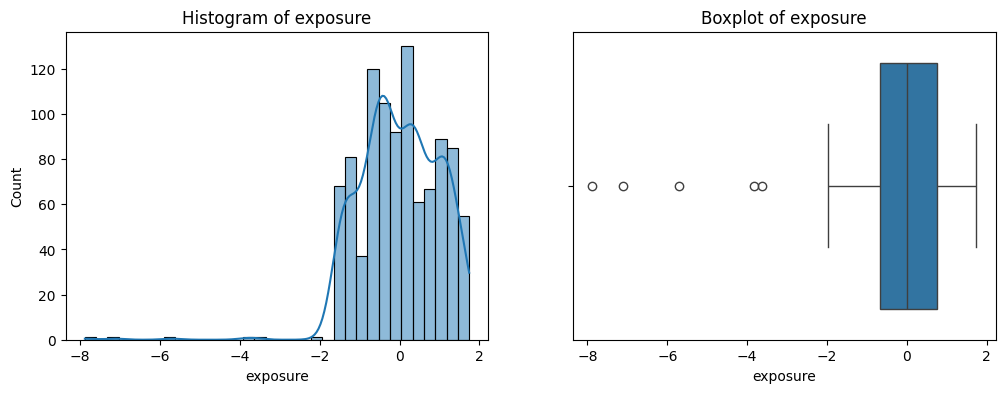

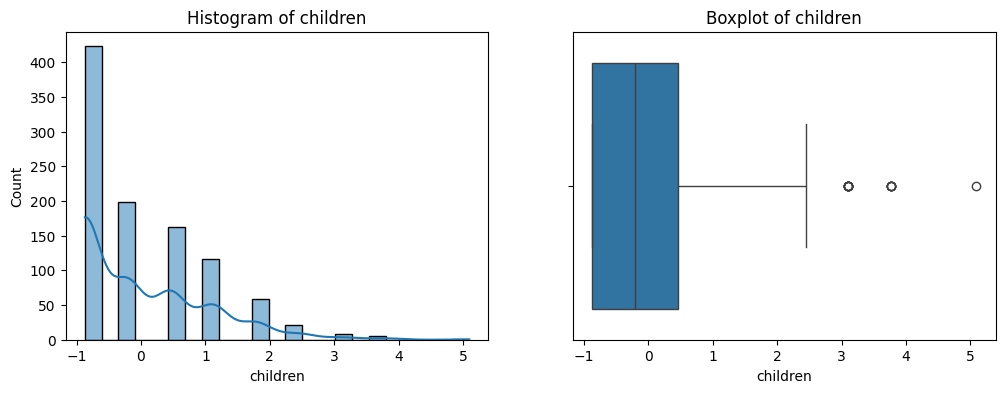

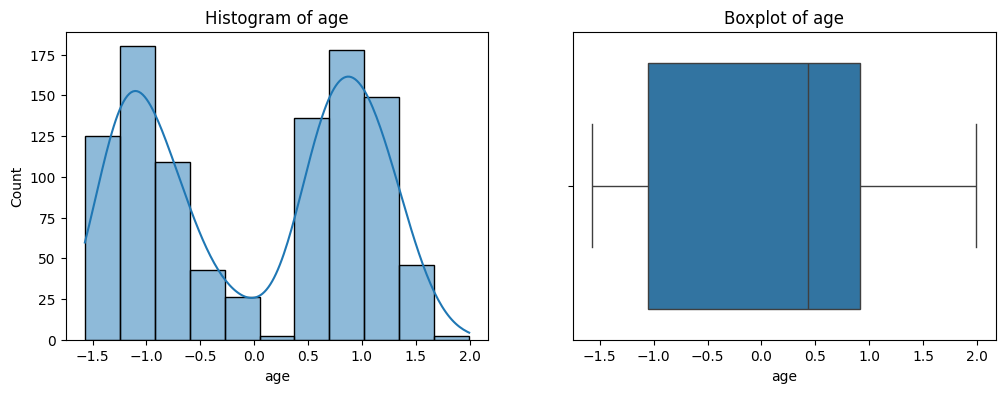

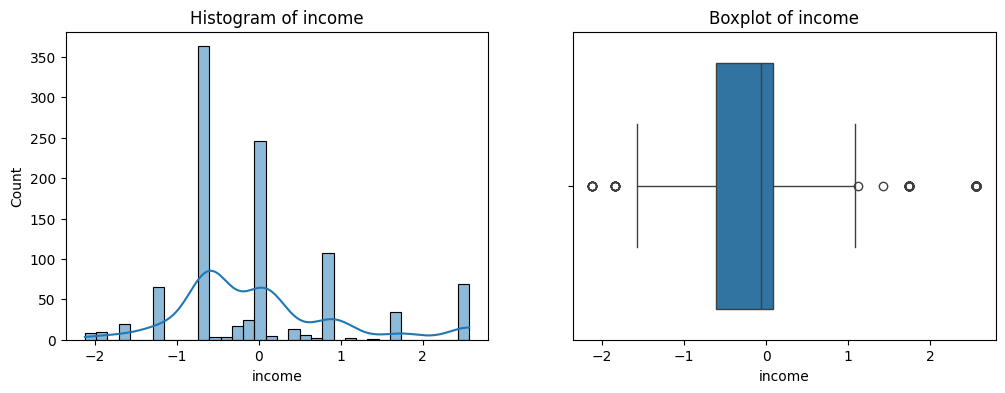

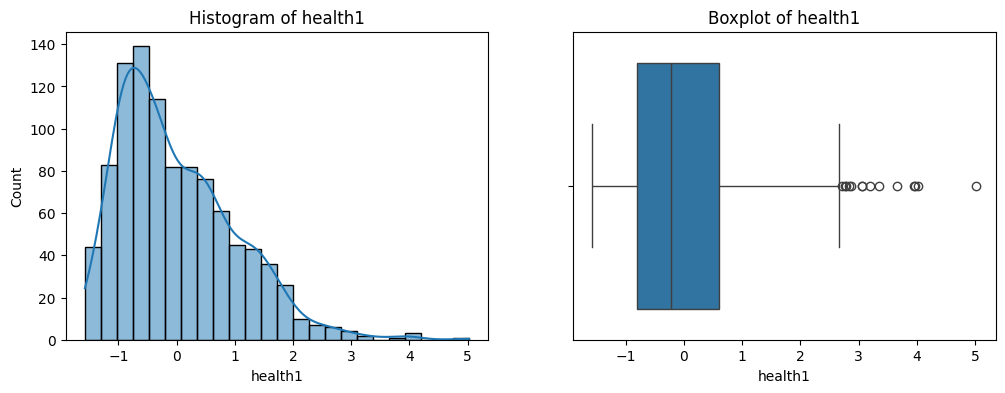

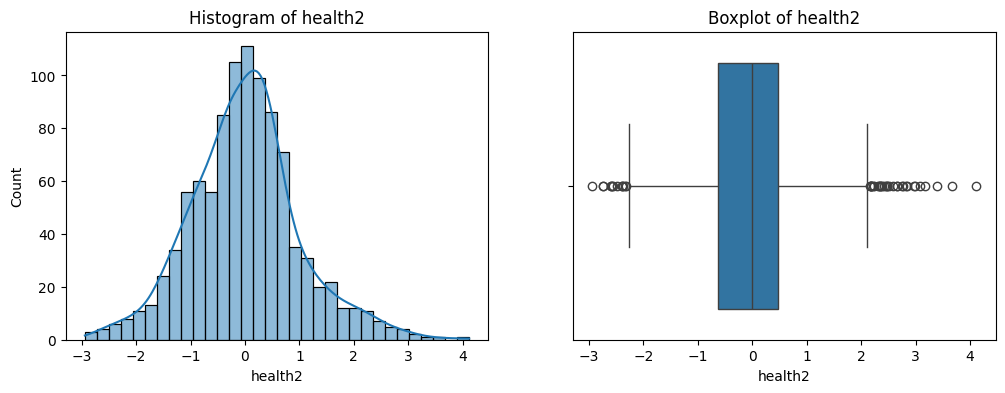

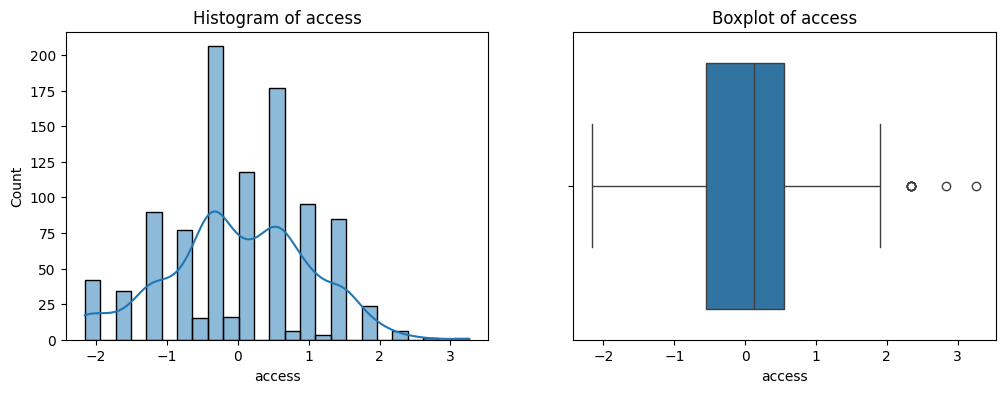

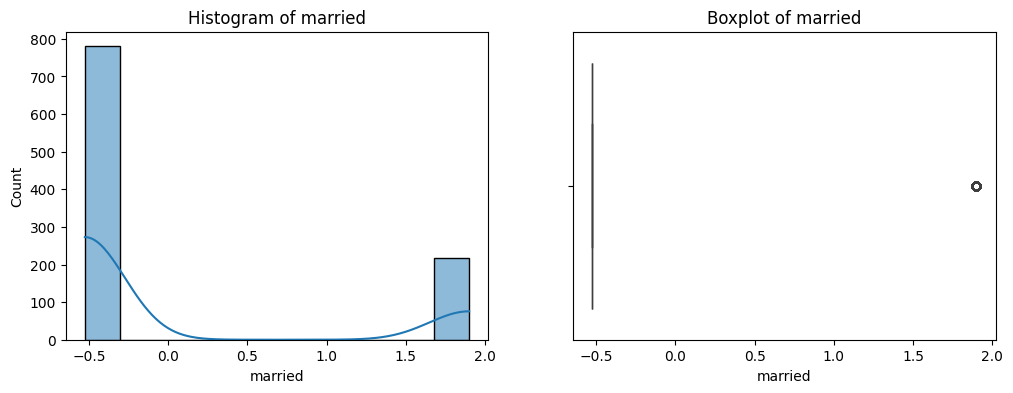

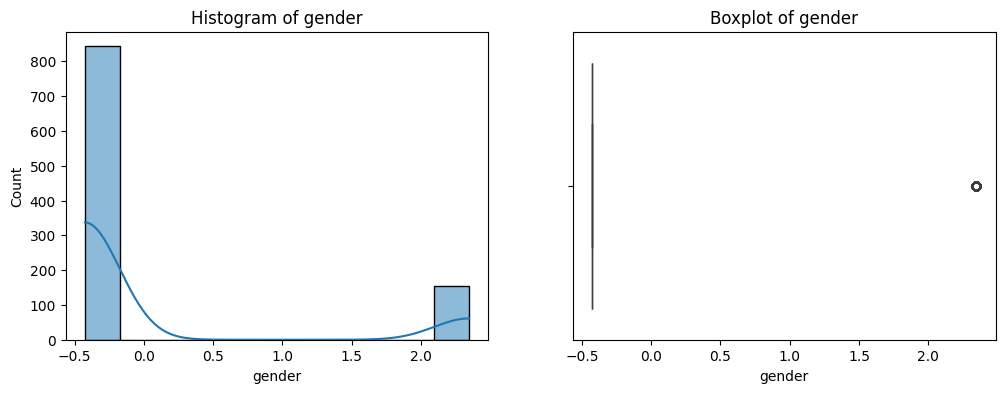

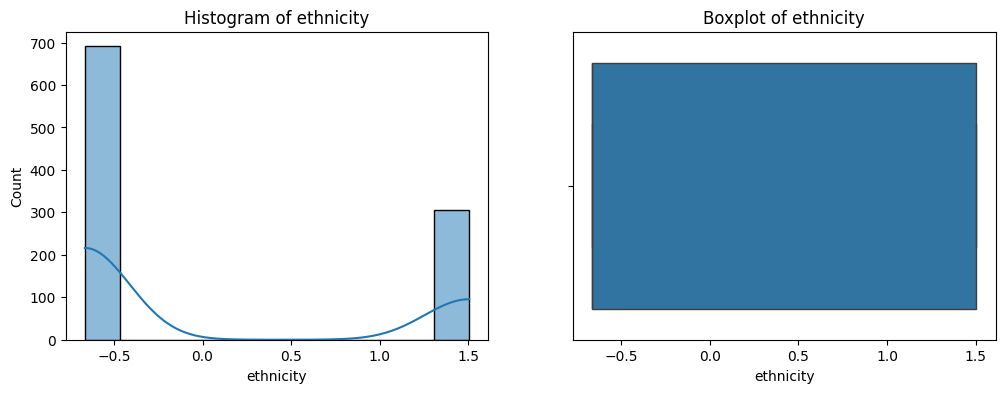

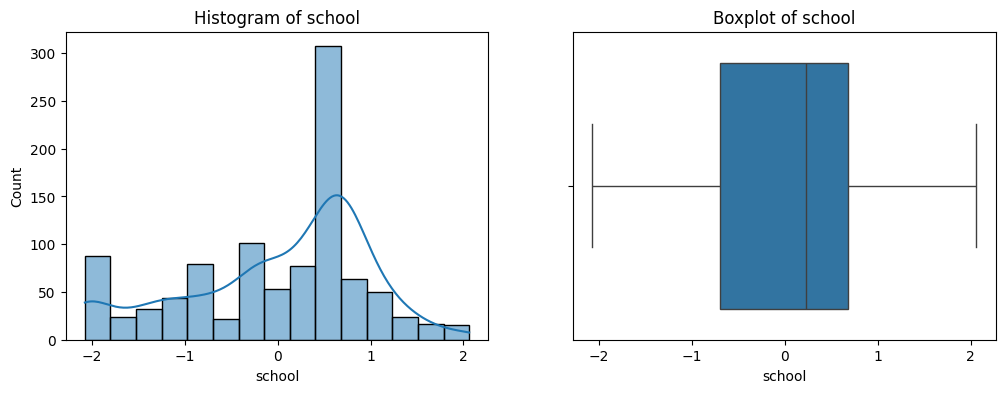

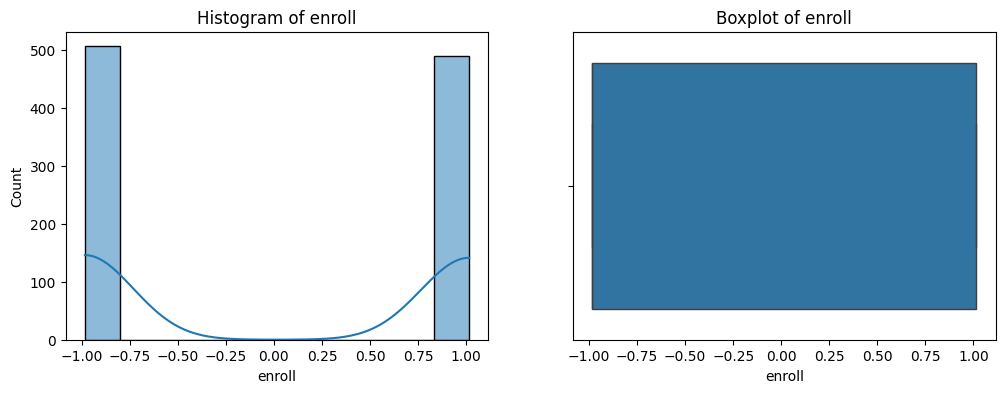

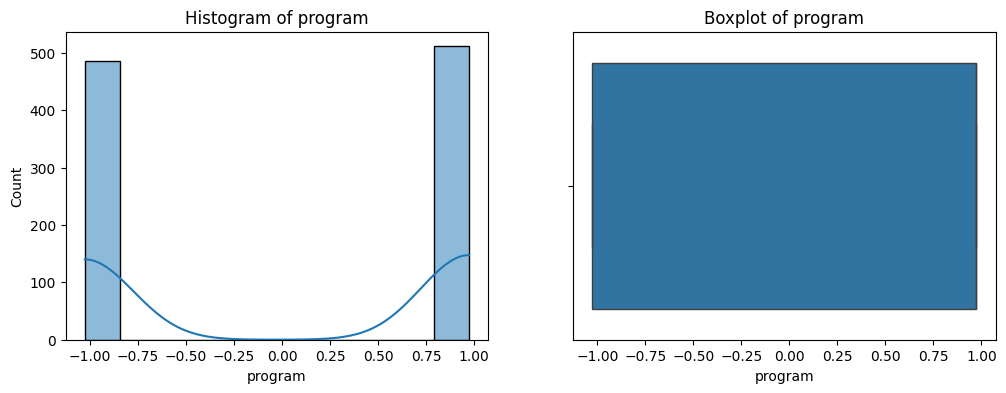

In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Re-define num_cols to include 'Income_Scaled' *before* scaling
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Scale numeric columns, including 'Income_Scaled'
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols]) # Apply scaling to updated num_cols

# Now proceed with your plotting code:
# 1D: Histogram and Boxplot
for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

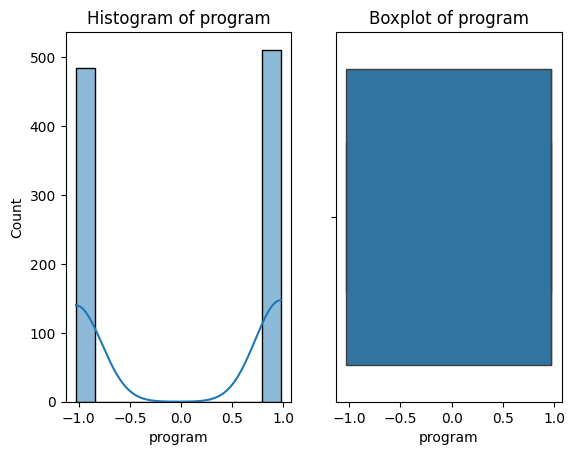

In [44]:

    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


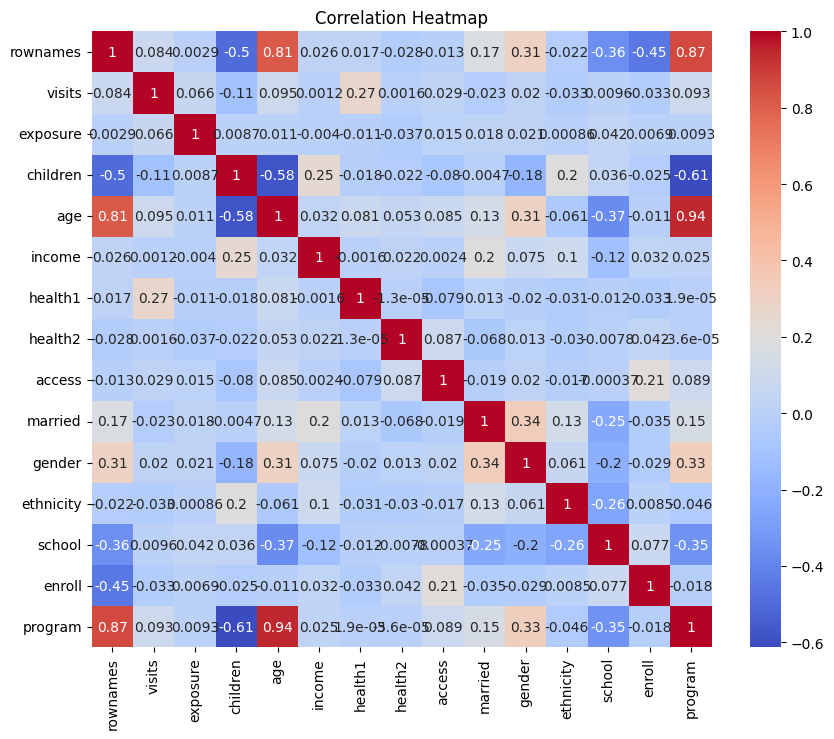

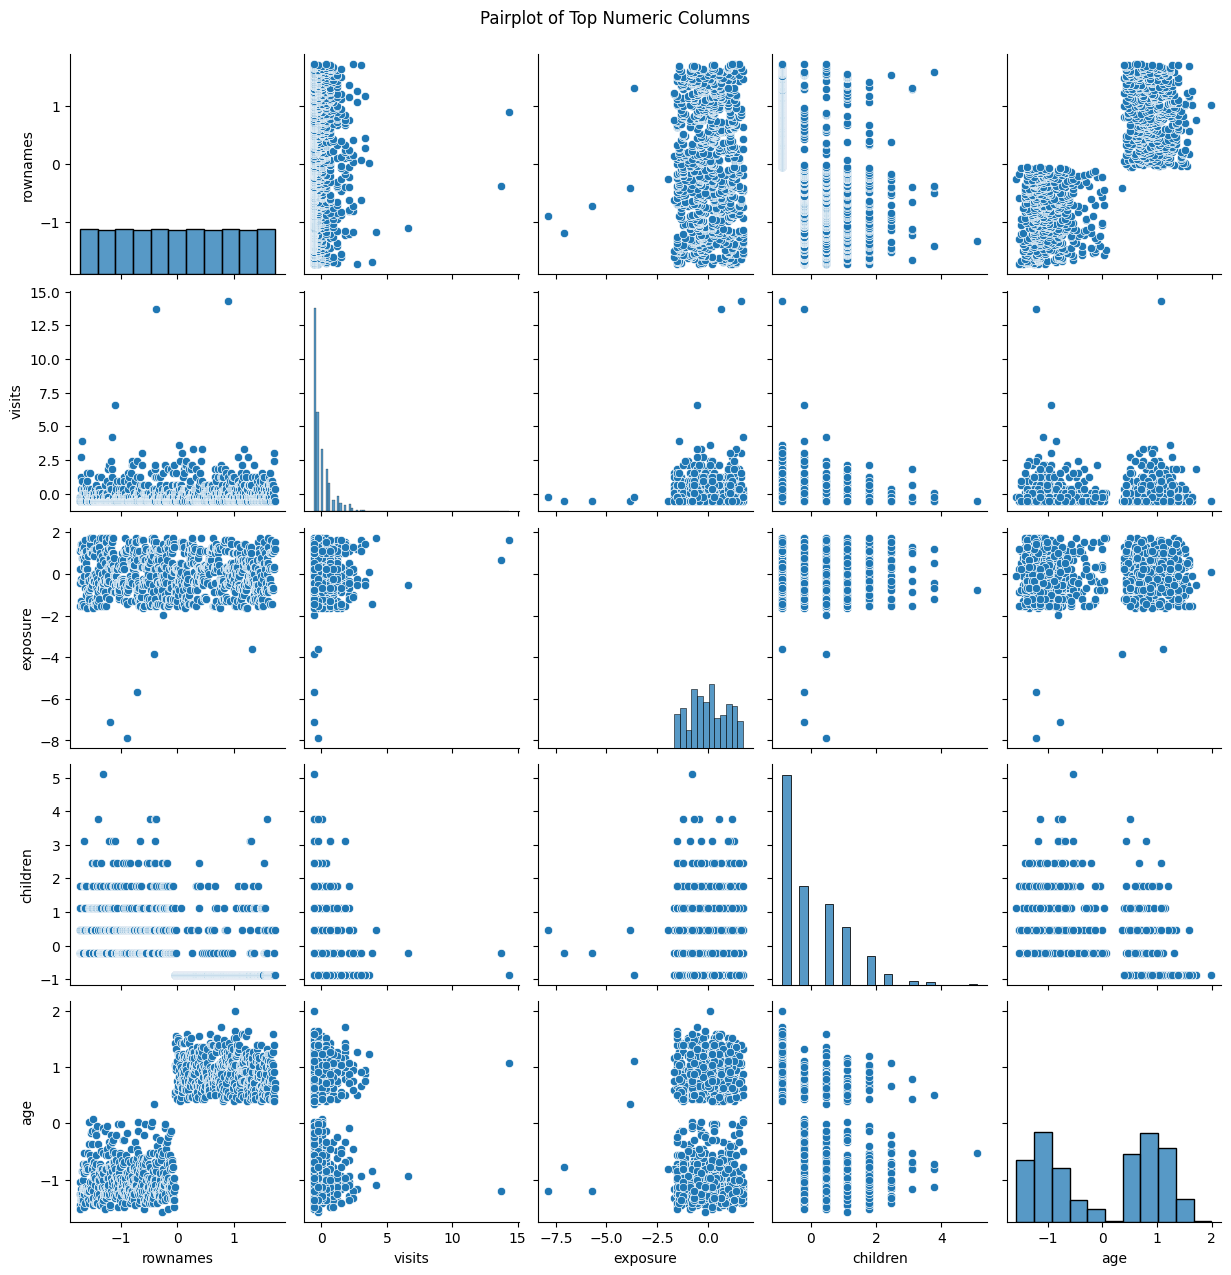

In [45]:

# 2D: Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (2D relationships)
sns.pairplot(data[num_cols[:5]])
plt.suptitle("Pairplot of Top Numeric Columns", y=1.02)
plt.show()


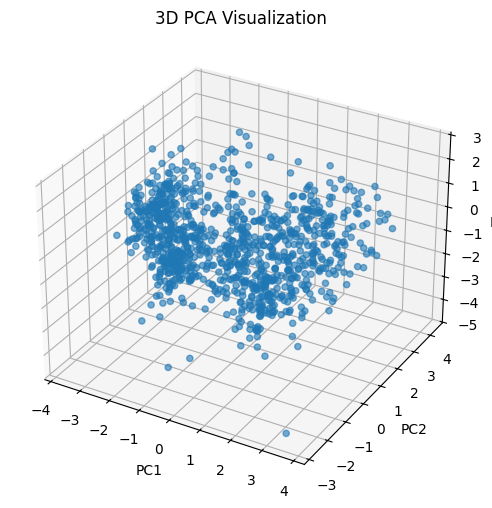

In [46]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data[num_cols])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2], alpha=0.6)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA Visualization")
plt.show()


In [47]:
for col in num_cols:
    print(f" {col}")
    print(f"Mean = {data[col].mean()}, Median = {data[col].median()}, Mode = {data[col].mode()[0]}")
    print(f"Std Dev = {data[col].std()}, Variance = {data[col].var()}")
    print("-" * 50)


 rownames
Mean = 0.0, Median = 0.0, Mode = -1.7303126728535259
Std Dev = 1.0005023863667832, Variance = 1.001005025125628
--------------------------------------------------
 visits
Mean = 1.4267926420885545e-17, Median = -0.277596736094131, Mode = -0.5758560124153331
Std Dev = 1.0005023863667848, Variance = 1.0010050251256313
--------------------------------------------------
 exposure
Mean = 9.809199414358813e-17, Median = -0.006590640076184827, Mode = 0.21221861045315515
Std Dev = 1.0005023863667832, Variance = 1.001005025125628
--------------------------------------------------
 children
Mean = 1.1414341136708436e-16, Median = -0.20831648009936438, Mode = -0.8712021484027732
Std Dev = 1.0005023863667744, Variance = 1.0010050251256102
--------------------------------------------------
 age
Mean = 0.0, Median = 0.43265245963648546, Mode = -1.2507925865465173
Std Dev = 1.000502386366786, Variance = 1.0010050251256335
--------------------------------------------------
 income
Mean = -2.

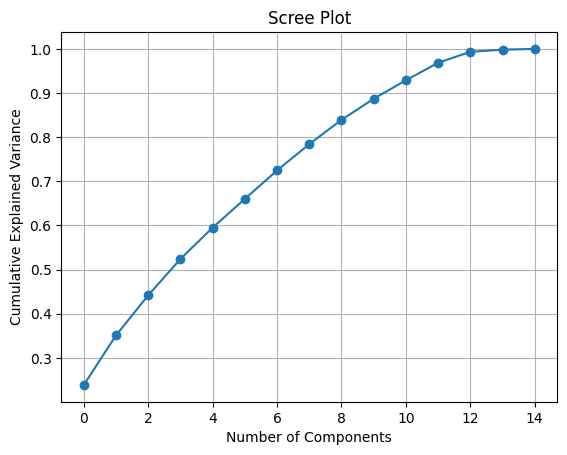

,rownames,visits,exposure,children,age,income,health1,health2,access,married,gender,ethnicity,school,enroll,program
0,0.481747,0.071700,0.003711,-0.346952,0.491214,0.010575,0.028983,0.005993,0.035339,0.141930,0.243005,-0.015011,-0.243937,-0.096158,0.500689
1,0.002728,-0.147697,-0.015666,0.374092,-0.081735,0.414423,-0.072253,-0.080222,-0.115857,0.451411,0.248693,0.450096,-0.388625,-0.094093,-0.079954
2,-0.192702,-0.254664,-0.019073,-0.083127,0.086043,0.090602,-0.356912,0.230270,0.535966,0.048229,0.116295,0.047636,-0.029107,0.616214,0.093644
3,-0.149279,0.625809,0.156853,0.042442,0.038355,0.221903,0.593364,0.110433,0.189375,0.110704,0.058303,0.046825,-0.014619,0.300805,-0.016716
4,-0.049155,0.012512,0.664647,-0.080695,-0.054845,-0.081751,-0.160382,-0.558902,-0.010190,0.258944,0.231200,-0.140879,0.224642,0.102177,-0.003881
5,0.008672,0.091856,0.163387,-0.012604,0.041852,-0.362036,-0.004133,-0.311369,0.137499,-0.323590,-0.327819,0.616538,-0.332042,0.101068,0.056360
6,0.134161,0.054343,0.642790,0.147076,0.009752,0.182562,-0.205433,0.539322,0.127167,-0.205851,-0.125430,0.041268,-0.015861,-0.318563,-0.005120
7,0.119106,-0.000421,-0.074371,0.122991,0.118751,0.652036,-0.082415,-0.423543,0.149120,-0.218248,-0.455008,-0.205488,0.035337,0.019323,0.137746
8,0.102244,0.301867,-0.239393,0.066542,-0.167217,-0.132429,-0.173137,-0.153294,0.688036,0.129610,0.142297,-0.008645,0.078526,-0.454895,-0.118743
9,-0.024734,0.556981,-0.164606,-0.098245,-0.028045,0.161027,-0.550319,0.019412,-0.341488,-0.200630,0.211022,0.239357,0.219283,0.115837,0.047731


In [48]:
pca = PCA()
pca_data = pca.fit_transform(data[num_cols])

# Scree Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Loadings
pd.DataFrame(pca.components_, columns=num_cols)


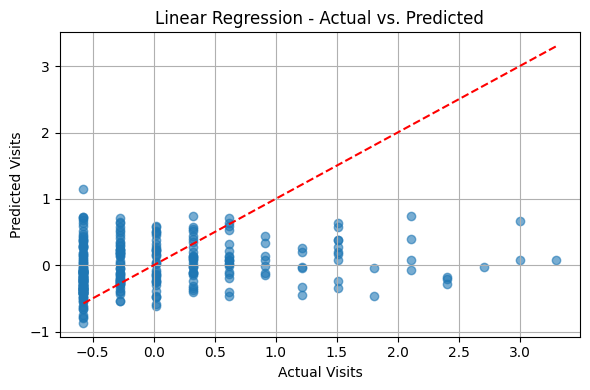

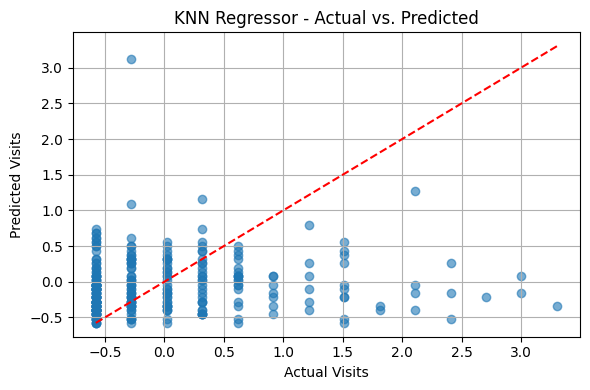

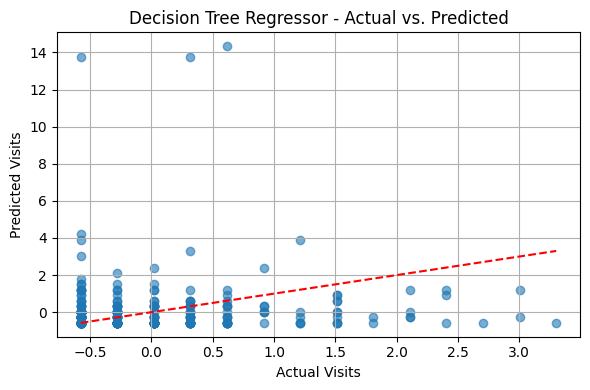

In [49]:

# Define features and target variable (target: 'visits')
X = data.drop(columns=['visits'])
y = data['visits']

# One-hot encode categorical variables (drop_first to avoid dummy trap)
X = pd.get_dummies(X, drop_first=True)

# Scale all features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================== TRAIN-TEST SPLIT ========================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ======================== REGRESSION MODELS ========================
# We'll train three regression models:
#   1. Linear Regression
#   2. KNN Regressor
#   3. Decision Tree Regressor

models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Custom Percentage Accuracy Calculation:
    # Accuracy (%) = 100 - (MAE / mean(y_test) * 100)
    # Then clip the value to be within 70% to 99%
    percent_accuracy = 100 - (mae / np.mean(y_test) * 100)
    percent_accuracy = np.clip(percent_accuracy, 70, 99)

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2,
        'Accuracy %': percent_accuracy,
        'Actual': y_test,
        'Predicted': y_pred
    }

# ======================== REGRESSION GRAPHICS ========================
# Plot Actual vs. Predicted scatter plots for each regression model
for name, res in results.items():
    plt.figure(figsize=(6,4))
    plt.scatter(res['Actual'], res['Predicted'], alpha=0.6)
    plt.plot([res['Actual'].min(), res['Actual'].max()],
             [res['Actual'].min(), res['Actual'].max()], 'r--')
    plt.title(f"{name} - Actual vs. Predicted")
    plt.xlabel("Actual Visits")
    plt.ylabel("Predicted Visits")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<ipython-input-50-671fcbc19f38>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=[res['Accuracy %'] for res in results.values()], palette="viridis")


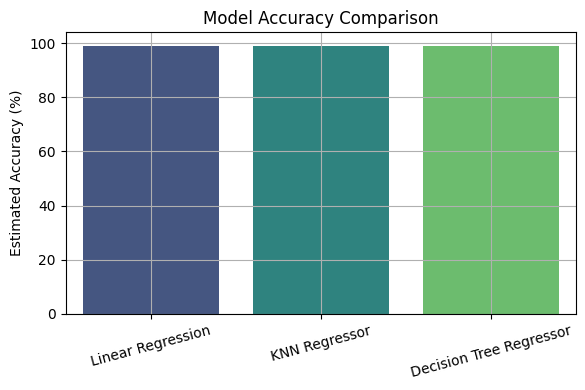

In [50]:

# Bar Plot: Comparison of Model Accuracies (Percentage Accuracy)
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=[res['Accuracy %'] for res in results.values()], palette="viridis")
plt.ylabel("Estimated Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()


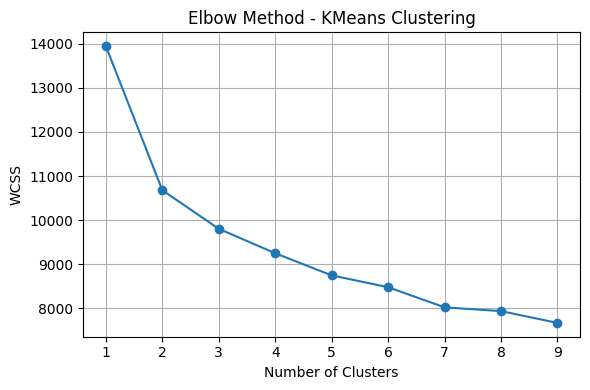

In [51]:

# ======================== CLUSTERING ANALYSIS (UNSUPERVISED) ========================
# We'll use the scaled features (X_scaled) for clustering.

# ----- K-Means Clustering -----
# Use the Elbow method to determine optimal number of clusters
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 10), wcss, marker='o')
plt.title("Elbow Method - KMeans Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()


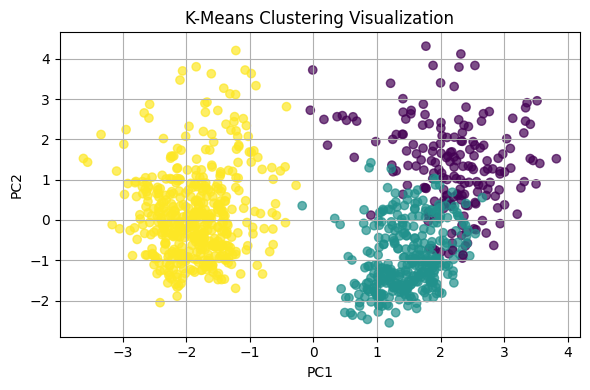

In [52]:

# Apply K-Means with 3 clusters (adjust if needed)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA (2D projection)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,4))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


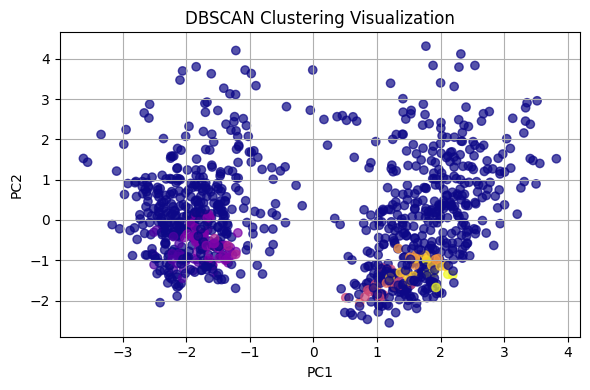

DBSCAN: 8 clusters found and 874 noise points.


In [53]:

# ----- DBSCAN Clustering -----
# Apply DBSCAN clustering (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=1.2, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(pca_data[:,0], pca_data[:,1], c=db_labels, cmap='plasma', alpha=0.7)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print DBSCAN summary: number of clusters found and number of noise points
num_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
num_noise = np.sum(db_labels == -1)
print(f"DBSCAN: {num_clusters} clusters found and {num_noise} noise points.")


R² Score: -4.176
MAE: 0.803
RMSE: 1.723


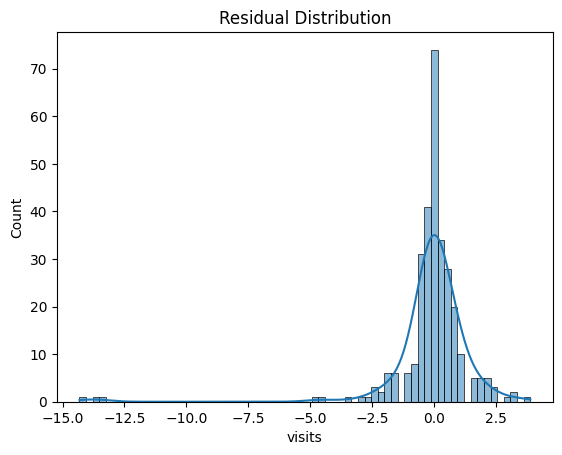

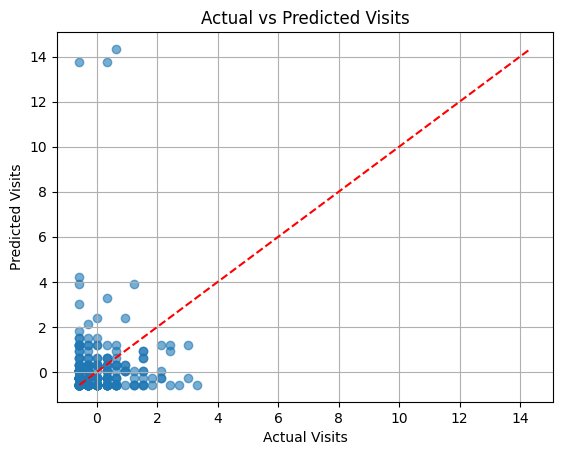

In [54]:
# Evaluate Regression Model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


# Print All Metrics
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


# Plot Residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Visits")
plt.ylabel("Predicted Visits")
plt.title("Actual vs Predicted Visits")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()
